<a href="https://colab.research.google.com/github/vindinudecosta/Mobile-Based-Crop-Leaf-Disease-Detection-System-Using-Deep-Learning/blob/main/Rice_Disease_Classification_TFlite_model_MobileNetV2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/Rice Leaf Disease Images_zip.zip','r') as zipObj:
     zipObj.extractall('Rice Leaf Disease Images')

In [3]:
!pip install split-folders[full]

In [4]:
import splitfolders
input_folder = '/content/Rice Leaf Disease Images/Rice Leaf Disease Images'
splitfolders.ratio(input_folder,output ="dataset",
                   seed = 42,ratio=(0.7,0.1,0.2),
                   group_prefix=None)

Copying files: 9315 files [00:02, 3542.29 files/s]


In [5]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 128
CHANNELS = 3
EPOCHS =10

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/Rice Leaf Disease Images/Rice Leaf Disease Images")

Found 9315 files belonging to 7 classes.


In [8]:
class_names = dataset.class_names
class_names

['Bacterialblight',
 'Brownspot',
 'Healthy',
 'Leaf Blast',
 'Leaf Scald',
 'Narrow brown',
 'Tungro']

In [9]:
train_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

train_generator = train_datagen.flow_from_directory('/content/dataset/train',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 6518 images belonging to 7 classes.


In [10]:
validation_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

validation_generator = validation_datagen.flow_from_directory('/content/dataset/val',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size= BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 928 images belonging to 7 classes.


In [11]:
test_datagen = ImageDataGenerator(

                 rescale = 1./255,
                 horizontal_flip= True,
                 rotation_range =10

)

test_generator = test_datagen.flow_from_directory('/content/dataset/test',

                                                    target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=BATCH_SIZE,
                                                    class_mode='sparse',

                                                    )

Found 1869 images belonging to 7 classes.


In [12]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =7
base_model = tf.keras.applications.MobileNetV2(
    input_shape = input_shape,
    include_top=False,
    weights='imagenet',

)

for layer in base_model.layers:
    layer.trainable = False
#x = layers.Flatten()(x)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=outputs)


9406464/9406464 [==============================] - 0s 0us/step


In [13]:
model.compile(
  optimizer = 'RMSprop',
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
  metrics = ['accuracy']

)

In [14]:
history = model.fit(

    train_generator,
    steps_per_epoch= 50,
    batch_size =BATCH_SIZE,
    validation_data= validation_generator,
    validation_steps =7,
    verbose=1,
    epochs =10
)

Epoch 1/10
50/50 [==============================] - 158s 3s/step - loss: 0.6922 - accuracy: 0.7410 - val_loss: 0.3552 - val_accuracy: 0.8783
Epoch 2/10
50/50 [==============================] - 124s 2s/step - loss: 0.3151 - accuracy: 0.8844 - val_loss: 0.2319 - val_accuracy: 0.9263
Epoch 3/10
50/50 [==============================] - 126s 3s/step - loss: 0.2304 - accuracy: 0.9152 - val_loss: 0.1887 - val_accuracy: 0.9375
Epoch 4/10
50/50 [==============================] - 126s 2s/step - loss: 0.1756 - accuracy: 0.9390 - val_loss: 0.2484 - val_accuracy: 0.9062
Epoch 5/10
50/50 [==============================] - 119s 2s/step - loss: 0.1362 - accuracy: 0.9526 - val_loss: 0.1154 - val_accuracy: 0.9632
Epoch 6/10
50/50 [==============================] - 121s 2s/step - loss: 0.1104 - accuracy: 0.9637 - val_loss: 0.1421 - val_accuracy: 0.9487
Epoch 7/10
50/50 [==============================] - 121s 2s/step - loss: 0.1067 - accuracy: 0.9623 - val_loss: 0.1816 - val_accuracy: 0.9219
Epoch 8/10
50

In [46]:
scores = model.evaluate(test_generator,verbose=0)
print('unqauntized model test accuracy:', scores*100)

unqauntized model test accuracy: [0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

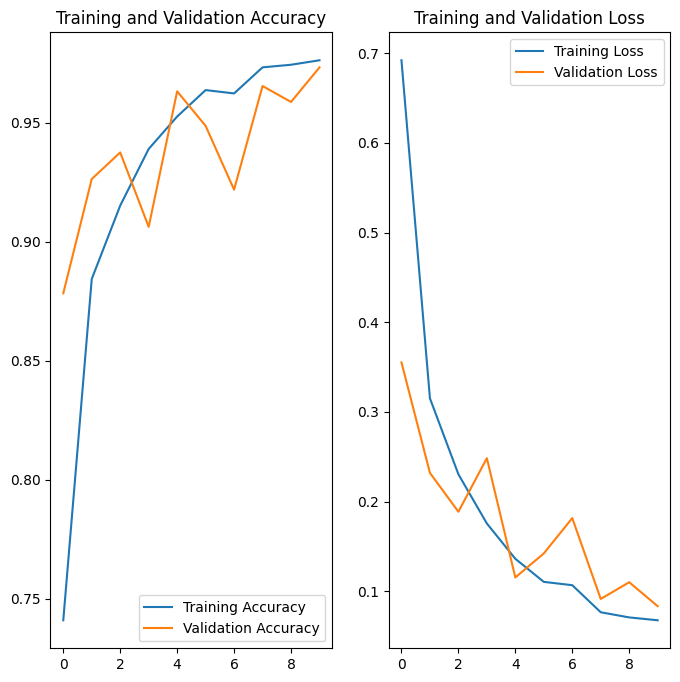

In [17]:
plt.figure(figsize =(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training Loss')
plt.plot(range(EPOCHS),val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label:  Tungro
4/4 [==============================] - 2s 39ms/step
Predicted label:  Tungro


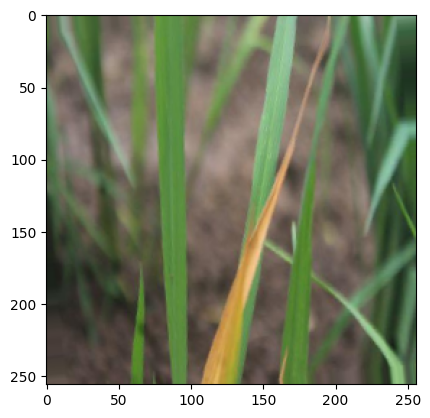

In [18]:
import numpy as np

for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int (labels_batch[0])

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label: ", class_names[first_label])


  batch_prediction = model.predict(images_batch)
  print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])
  break

In [19]:
def predict(model, img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i])
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = class_names[np.argmax(predictions[0])]
  confidence = round(100* (np.max(predictions[0])),2)

  return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


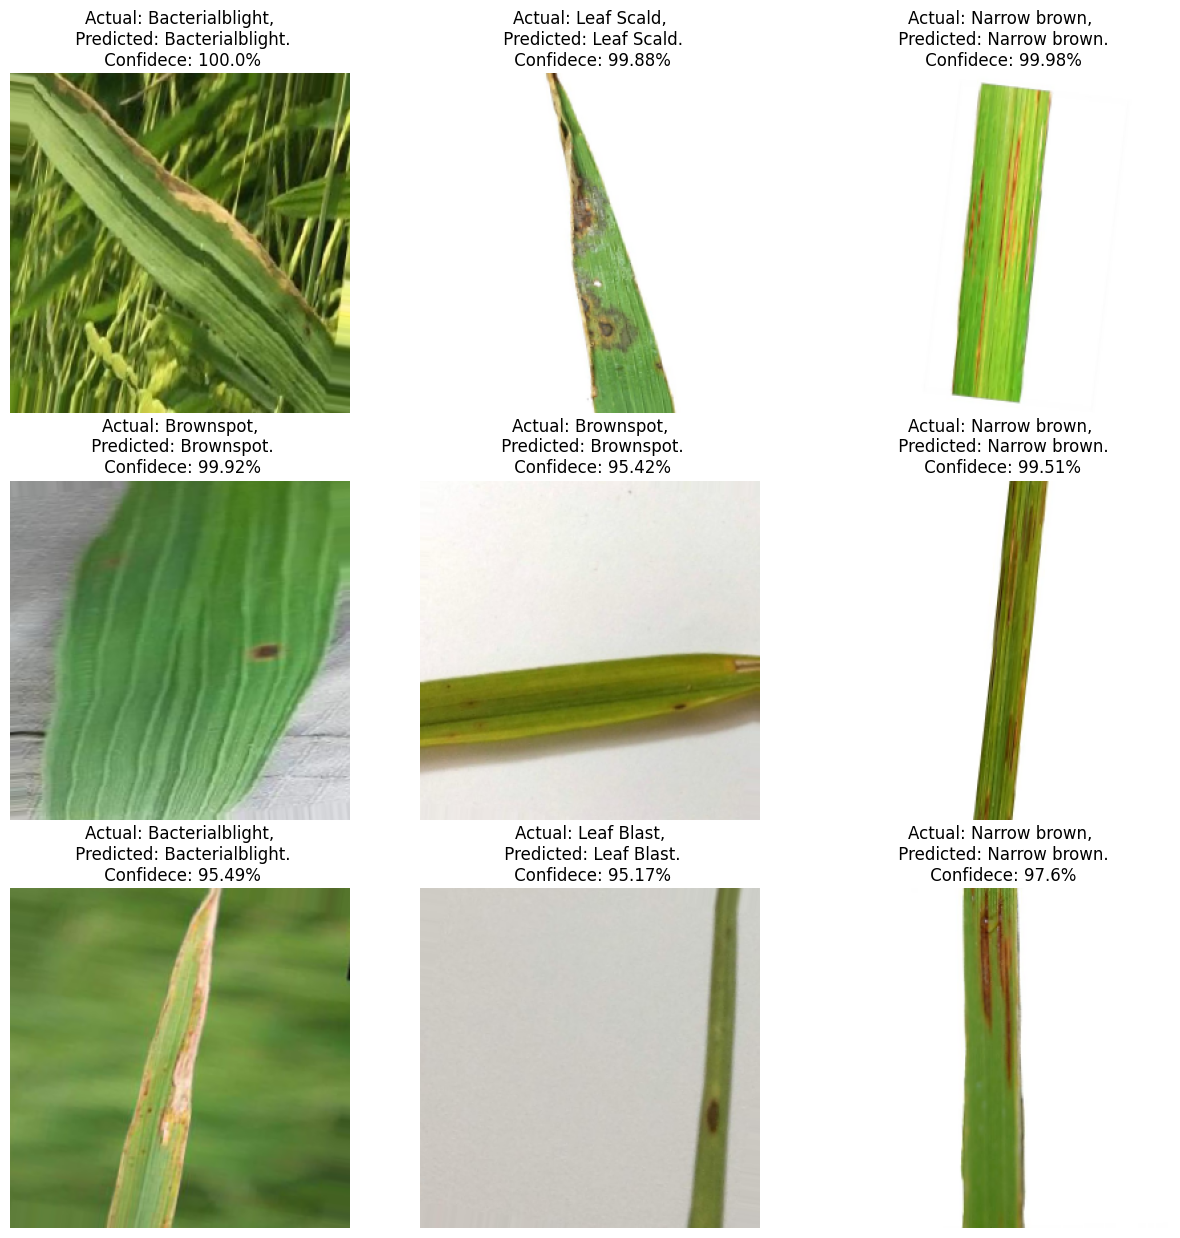

In [20]:
plt.figure(figsize = (15,15))
for images, labels in test_generator:

  for i in range(9):

    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i])

    predicted_class, confidence = predict(model, images[i])
    actual_class = class_names[int(labels[i])]

    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidece: {confidence}%")

    plt.axis("off")
  break

In [21]:
model.save("/content/gdrive/MyDrive/Rice_disease_classification_models/trained_model_rice_v1.h5")

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [23]:
with open('/content/gdrive/MyDrive/Rice_disease_classification_models/tflite_quant_model_rice_v1.tflite', 'wb') as f:
   f.write(tflite_quant_model)



In [41]:
import numpy

In [43]:
test_images = []
test_labels = []
for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    test_images.extend(batch_images)
    test_labels.extend(batch_labels)

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [44]:
def evaluate(interpreter):
  prediction= []
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]
  input_format = interpreter.get_output_details()[0]['dtype']

  for i, test_image in enumerate(test_images):
    if i % 100 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    test_image = np.expand_dims(test_image, axis=0).astype(input_format)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()
    output = interpreter.tensor(output_index)
    predicted_label = np.argmax(output()[0])
    prediction.append(predicted_label)

  print('\n')
  # Comparing prediction results with ground truth labels to calculate accuracy.
  prediction = np.array(prediction)
  accuracy = (prediction == test_labels).mean()
  return accuracy

In [48]:
# Passing the Integer Quantized TF Lite model to the Interpreter.
interpreter = tf.lite.Interpreter('/content/gdrive/MyDrive/Rice_disease_classification_models/tflite_quant_model_rice_v1.tflite')
# Allocating tensors.
interpreter.allocate_tensors()
# Evaluating the model on the test images.
test_accuracy = evaluate(interpreter)
print('Quantized TFLite Model Test Accuracy:', test_accuracy*100)
print('Baseline Keras Model Test Accuracy:', scores*100)


Evaluated on 0 results so far.
Evaluated on 100 results so far.
Evaluated on 200 results so far.
Evaluated on 300 results so far.
Evaluated on 400 results so far.
Evaluated on 500 results so far.
Evaluated on 600 results so far.
Evaluated on 700 results so far.
Evaluated on 800 results so far.
Evaluated on 900 results so far.
Evaluated on 1000 results so far.
Evaluated on 1100 results so far.
Evaluated on 1200 results so far.
Evaluated on 1300 results so far.
Evaluated on 1400 results so far.
Evaluated on 1500 results so far.
Evaluated on 1600 results so far.
Evaluated on 1700 results so far.
Evaluated on 1800 results so far.


Quantized TFLite Model Test Accuracy: 97.05724986623862
Baseline Keras Model Test Accuracy: [0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.9780631065368652, 0.05436744913458824, 0.97